# Stroke Predictions

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Drop ID since we think it isn't necessary
df.drop('id', axis = 1, inplace = True)

In [3]:
# Show info about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
# Show statistical information about the dataframe
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Total nulls
df.bmi.isnull().sum()

201

In [6]:
# Since only 200 total NA values, we decided to drop them 
df.dropna(inplace = True)

In [7]:
len(df)

4909

In [8]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
len(df.query("smoking_status == 'Unknown'"))

1483

Handling unknown values in the smoking_status column.

In [10]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

We came to the conclusion to remove observations that had a smoking_status of 'Unknown'. We felt that if left in the dataset, it wouldn't provide us any valuable information that would help predict stroke.

In [11]:
df = df.query("smoking_status != 'Unknown'")

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3426 non-null   object 
 1   age                3426 non-null   float64
 2   hypertension       3426 non-null   int64  
 3   heart_disease      3426 non-null   int64  
 4   ever_married       3426 non-null   object 
 5   work_type          3426 non-null   object 
 6   Residence_type     3426 non-null   object 
 7   avg_glucose_level  3426 non-null   float64
 8   bmi                3426 non-null   float64
 9   smoking_status     3426 non-null   object 
 10  stroke             3426 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.2+ KB


In [22]:
df.query("(age <= 40) & (stroke ==1)")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,Female,39.0,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
118,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
182,Female,32.0,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
210,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
228,Female,39.0,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1


In [23]:
import matplotlib.pyplot as plt

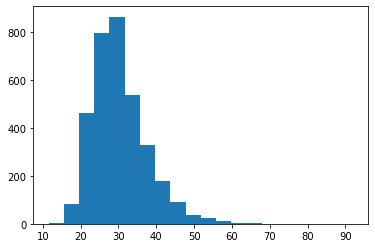

In [34]:
plt.hist(df.bmi, bins = 20);

In [30]:
df.query("(bmi <= 30) & (stroke ==1)")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
231,Female,79.0,0,0,Yes,Private,Urban,97.73,21.5,smokes,1
233,Female,77.0,1,0,Yes,Self-employed,Urban,199.84,28.0,formerly smoked,1
238,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1
240,Male,66.0,0,0,Yes,Private,Rural,76.46,21.2,formerly smoked,1


In [58]:
def all_value_counts(df):
    for each in df.columns:
        print(f"---------\nFeature: {each}\n{df[each].value_counts()}")

In [59]:
all_value_counts(df)

---------
Feature: gender
Female    2086
Male      1339
Other        1
Name: gender, dtype: int64
---------
Feature: age
54.0    77
57.0    76
78.0    70
52.0    69
51.0    69
        ..
14.0    24
12.0    19
13.0    19
11.0    12
10.0     9
Name: age, Length: 73, dtype: int64
---------
Feature: hypertension
0    3018
1     408
Name: hypertension, dtype: int64
---------
Feature: heart_disease
0    3220
1     206
Name: heart_disease, dtype: int64
---------
Feature: ever_married
Yes    2599
No      827
Name: ever_married, dtype: int64
---------
Feature: work_type
Private          2201
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64
---------
Feature: Residence_type
Urban    1745
Rural    1681
Name: Residence_type, dtype: int64
---------
Feature: avg_glucose_level
91.85     5
73.00     5
100.54    4
67.92     4
72.49     4
         ..
82.08     1
69.46     1
150.45    1
190.70    1
243.50    1
Name: avg_glucose_level, L

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.apply(le.fit_transform)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,57,0,1,1,2,1,2795,205,0,1
2,1,70,0,1,1,2,0,1836,164,1,1
3,0,39,0,0,1,2,1,2437,183,2,1
4,0,69,1,0,1,3,0,2445,79,1,1
5,1,71,0,0,1,2,1,2484,129,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,72,1,0,1,3,0,494,122,1,0
5102,0,47,0,0,1,2,0,731,56,1,0
5106,0,71,0,0,1,3,1,2203,239,1,0
5107,0,25,0,0,1,3,0,968,145,1,0


In [63]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [66]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [67]:
df_dummies

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82.0,1,0,71.97,28.3,0,1,0,1,0,0,1,0,0,1,0
5102,57.0,0,0,77.93,21.7,0,0,0,1,0,1,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,1,0


In [1]:
import pickle

pickle_out = open('pickled_files/df.pickle',"wb")
pickle.dump(df_dummies, pickle_out)
pickle_out.close()

NameError: name 'df_dummies' is not defined